   # NLP with Python

<p align="center">
<img src="img/live_preview.jpeg" width="550">
</p>

Follow the Data Science pipeline to plot frequency distributions of words in *On Handling the Data*.
Novels are scraped from the website [Project Gutenberg](https://www.gutenberg.org/) (large corpus of books) using the Python package `requests` and extracted using `BeautifulSoup`. Analyze a novel using the Natural Language ToolKit (`nltk`).
The process teaches critical aspects of Natural Language Processing (NLP) such as tokenization and stopwords.
Visualize word frequency distributions of any novel from Project Gutenberg.
The NLP skills developed, however, are applicable to much of what Data Scientists encounter as the vast proportion of the world's data is unstructured data and includes a great deal of text.

This code was generated from a Jupyter Notebook found in [this repository](https://github.com/lonesome-data/CY3650-Project.git) and inspired by Hugo Bowne-Anderson's 'Frequencies of words in novels: a Data Science pipeline'. 

## Pre-steps

Follow the instructions in the README.md to get your system set up and ready to go.

## 1. State Your Question

What are the most frequent words in the novel _On Handling the Data_ and how often do they occur?

## 2. Collect Data

In this example, the raw data is M. I. Mayfield's text _On Handling the Data_.  Imagine other sources of raw data.  For instance, a classifed transcript of a discussion captured using SIGINT.... 

The focal text of this project is freely available online at [Project Gutenberg](https://www.gutenberg.org/). The following will declare a variable pointing to the text's location at the Project Gutenberg url:

In [1]:
# Store url
url = 'https://www.gutenberg.org/files/23429/23429-h/23429-h.htm'

With access to the specific URL, now fetch the HTML. 

**Note** that HTML stands for Hypertext Markup Language and is the standard markup language for the web.

This project will demonstrate use of [`requests`](http://docs.python-requests.org/en/master/).  One of the [most popular](https://pythontips.com/2013/07/30/20-python-libraries-you-cant-live-without/) and useful Python packages.

Find out more in DataCamp's [Importing Data in Python (Part 2) course](https://www.datacamp.com/courses/importing-data-in-python-part-2). 

<img src="img/requests.png" width="200">

According to the `requests` package website:

> Requests allows you to send organic, grass-fed HTTP/1.1 requests, without the need for manual labor.

and the following organizations claim to use `requests` internally:

> Her Majesty's Government, Amazon, Google, Twilio, NPR, Obama for America,  Twitter, Sony, and Federal U.S. Institutions that prefer to be unnamed.

Moreover,

> Requests is one of the most downloaded Python packages of all time, pulling in over 13,000,000 downloads every month. All the cool kids are doing it!

Below leverages a `GET` request from the website, which means we are _getting_ data from it. This is similar to what happens under the hood when navigating through a browser. There are other types of requests, such as `POST` requests; feel free to explore.  

`requests` make this easy with its `get` function. Let's make the request and check the object type returned.

In [2]:
# Import `requests`
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

This is a `Response` object. You can see in the [`requests` kickstart guide](http://docs.python-requests.org/en/master/user/quickstart/) that a `Response` object has an attribute `text` that allows extraction of the HTML. Let's assign and print the raw HTML extract 

In [4]:
# Extract HTML from Response object and print
html = r.text

#print(html)

This HTML _contains_ the text but not exactly ready for NLP.  This next step is ubiquious throughout data science and often coined _wrangling_ or _munging_.   

## 3. Data Wrangling (munging)

### Part 1: Get the Text from the HTML


Use the package [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/). The package website says:

<img src="img/bs4.png" width="550">



Sidebar: a brief word on the name of the package: Beautiful Soup. In web development, the term "tag soup" refers to structurally or syntactically incorrect HTML code written for a web page. Beautiful Soup converts malformed HTML to optimize extraction. The main object created and queried when using this package is called `BeautifulSoup`. After creating the soup, use its `.get_text()` method to extract the text.

In [5]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

From these soup objects, one can extract interesting information about the website, such as title:

In [6]:
# Get soup title
soup.title

<title>The Project Gutenberg eBook of On Handling the Data, by M. I. Mayfield</title>

Or the title as a string:

In [7]:
# Get soup title as string
soup.title.string

'The Project Gutenberg eBook of On Handling the Data, by M. I. Mayfield'

Or all URLs found within a page’s < a > tags (hyperlinks):

In [8]:
# Get hyperlinks from soup and check out first several
soup.findAll('a')[:8]

[<a href="http://www.gutenberg.org">www.gutenberg.org</a>,
 <a id="Page_137" name="Page_137">[137]</a>,
 <a id="Page_138" name="Page_138">[138]</a>,
 <a id="Page_139" name="Page_139">[139]</a>,
 <a id="Page_140" name="Page_140">[140]</a>,
 <a id="Page_141" name="Page_141">[141]</a>,
 <a id="Page_142" name="Page_142">[142]</a>,
 <a id="Page_143" name="Page_143">[143]</a>]

What you want to do is to extract the text from the `soup` and there's a super helpful `.get_text()` method precisely for this. 

Get the text, print it out and have a look at it. Is it what you want?

In [11]:
# Get the text out of the soup and print it
text = soup.get_text()
print(text)



The Project Gutenberg eBook of On Handling the Data, by M. I. Mayfield
    
/*<![CDATA[  XML blockout */
<!--
 a {text-decoration:none; color:blue;}
 a:visited {color:gray;}
 body {margin-left: 15%; margin-right: 15%;}
 h1,h2,h3 {text-align: center; clear: both;}
 h3 {margin:0 auto 0 auto;}
 hr {width:65%; margin:2em auto 2em auto; clear:both; text-align:center;}
 hr.full {width: 100%;}
 hr.minor {width: 45%; margin:1em auto 1em auto; clear:both;}
 blockquote {margin-left:5%; margin-right:10%;}
 p {margin-top:.75em; text-align:justify; margin-bottom:.75em; text-indent:1.5em;}
 p.noin {text-indent:0;}
 p.hi {margin-left: 1em; text-indent:-1em;}
 .b {font-weight:bold;}
 .bbox {border:solid 1px; padding:1em; margin:2em 10% 2em 10%;}
 .c {text-align:center;}
 .figleft {float:left; clear:left; margin:1em 1em 1em 0; padding:0; text-align:center;}
 .i {font-style:italic;}
 .mt2 {margin-top:2em;}
 .pagenum {position:absolute; left:95%; font-style:normal; font-size:smaller; text-align:right; 

Notice that this is getting closer to a workable product.   

It is the text of the novel bookedended with noise.  The noise is small compared to the target text.  The first round will retain the noise.  For more accurate results later, we'll filter out the noise.  

Now with the text of interest, count each words frequency and plot onto a histogram.  Natural Language Processing offers the ideal solution.

### Part 2: NLP

Use `nltk`, the [Natural Language Toolkit](http://www.nltk.org/) to:

1. _Tokenize_ the text (descretize desired sequences of characters);
2. Remove stopwords (words such as 'a' and 'the' that occur a great deal in ~ nearly all English language texts.


#### Step 1: Tokenize

Tokenize taget text using _regular expressions_. A regular expression, or _regex_ for short, is a _sequence of characters_ that define a _search pattern_. For example:

* A string consists of 'peter piper picked a peck of pickled peppers' and you want to extract from the list of _all_ words that begin with the letter 'p'. 

The regular expression that matches all words beginning with 'p' is 'p\w+'. Let's unpack this: 

* the 'p' at the beginning of the regular expression filters sequences of characters that start with a 'p';
* the '\w' is a special character that will match any alphanumeric A-z, a-z, 0-9, along with underscores;
* The '+' is a quantifier permitting matches of one or more of the preceding token ('\w+' will match one or more arbitrary sequences of alphanumeric characters and underscores.)

Put this all together and the regular expression 'p\w+' will match all substrings that start with a 'p' and are followed by alphanumeric characters and underscores. In most English language texts that make sense, this will correspond to words beginning with 'p'.

Call the built-in Python package `re` to extract all words beginning with 'p' from the sentence 'peter piper picked a peck of pickled peppers' as a warm-up.

In [14]:
# Import regex package
import re

# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex
ps = 'p\w+'


# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

Notice all words note beginning in 'p' are expunged

To effectively reinstate the expunged words, here is a regex matching all words.

In [15]:
# Find all words and print them
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

Apply this regex to the target _text_, the string that contains _On Handling the Data_:

In [19]:
# Find all words in On Handling the Data and print first 5
tokens = re.findall('\w+', text)
tokens[:15]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'On',
 'Handling',
 'the',
 'Data',
 'by',
 'M',
 'I',
 'Mayfield',
 'CDATA',
 'XML']

**Note** An alternate method is found with `nltk`, the [Natural Language Toolkit](http://www.nltk.org/):

In [20]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')

# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:15]

['The',
 'Project',
 'Gutenberg',
 'eBook',
 'of',
 'On',
 'Handling',
 'the',
 'Data',
 'by',
 'M',
 'I',
 'Mayfield',
 'CDATA',
 'XML']

We are at the goal line. Capitalization causes the same word to be tokenized mutliple times.  Build a list of all words from _On Handling the Data_ where all letters are lower case.  Python easily does this using the string method `.lower()`:

In [21]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())

# Print several items from list as sanity check
words[:15]

['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'on',
 'handling',
 'the',
 'data',
 'by',
 'm',
 'i',
 'mayfield',
 'cdata',
 'xml']

#### Step 2: Remove stop words

Known as stopwords, words that provide little value should be scrubbed from the target data.   

The package `nltk` has a list of stopwords in English which will be stored as `sw.` 



In [24]:
# Import nltk
import nltk

# load stopwords from package
nltk.download('stopwords')

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seanf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we']

Create a list of all words in `words` that are *not* in `sw`. One way to get this list is to loop over all elements of `words` and add the to a new list if they are *not* in `sw`:

In [26]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:15]

['project',
 'gutenberg',
 'ebook',
 'handling',
 'data',
 'mayfield',
 'cdata',
 'xml',
 'blockout',
 'text',
 'decoration',
 'none',
 'color',
 'blue',
 'visited']

## 4. Answer question

The original question was 'What are the most frequent words in the _On Handling the Data_ and how often do they occur?' 

Plot a frequency histogram of words in _On Handling the Data_ using `nltk`. 

* You create a frequency distribution object using the function `nltk.FreqDist()`;
* You use the `plot()` method of the resulting object.

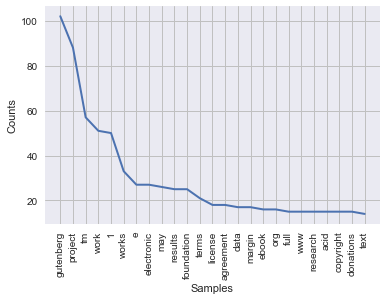

In [27]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

## 5. Present Solution

Interpretability of the solution is critical for informing both the technical and non-technical audience.  Fortunately, `nltk` offers an organic frequency ditribution plot that satitates both parties.   

___
## BONUS MATERIAL

As you have seen that there are lots of novels on Project Gutenberg, we can make these word frequency histograms of, it makes sense to write your own function that does all of this:

In [17]:
def plot_word_freq(url):
    """Takes a url (from Project Gutenberg) and plots a word frequency
    distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

Now use the function to plot word frequency distributions from other texts on Project Gutenberg:

* Pride and Prejudice:

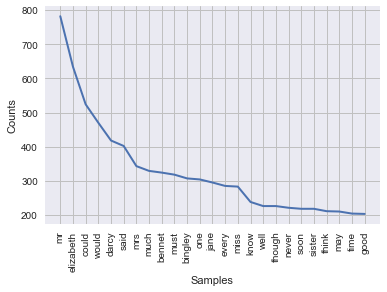

In [18]:
plot_word_freq('https://www.gutenberg.org/files/42671/42671-h/42671-h.htm')

* Robinson Crusoe

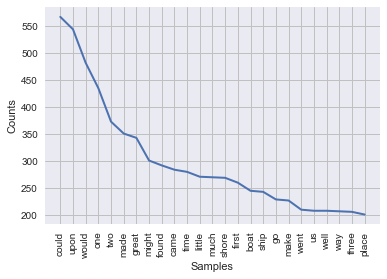

In [19]:
plot_word_freq('https://www.gutenberg.org/files/521/521-h/521-h.htm')

* The King James Bible

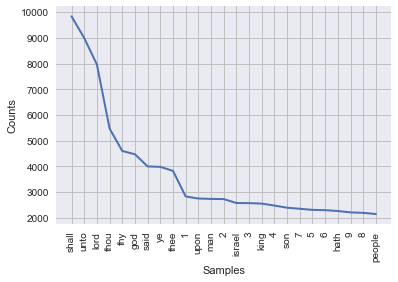

In [20]:
plot_word_freq('https://www.gutenberg.org/files/10/10-h/10-h.htm')

## Conclusion

In this post, the Data Science pipeline leveraged a frequency distribution plot of words in *Moby Dick*, among many other novels. To do this, the Python package `requests` scraped from the website [Project Gutenberg](https://www.gutenberg.org/) (large corpus of books) raw text from which `BeautifulSoup` extracted usable HTML.  The text was analyzed using the Natural Language ToolKit (`nltk`) and Natural Language Processing (NLP) with tokenization and stopwords.

Any available digital text is able to be visualized by word frequency distribution.  

The NLP skills demonstrated here are applicable to much of the data encountered as the vast proportion of the world's data is unstructured data and includes a great deal of text. 

This code was generated from a Jupyter Notebook found in [this repository](https://github.com/lonesome-data/CY3650-Project.git) and inspired by Hugo Bowne-Anderson's 'Frequencies of words in novels: a Data Science pipeline'. 